# King County Housing Regression Modelling

# Overview

To provide inference into King County's desired building standards, this project uses an iterative approach to Regression Modelling in order to understand the top 3 architectural features of a house that are correlated with it's selling price. Metricon Homes can not only use this analysis in order to make the most out of their King County Subdivision project, but it may also prove useful if they are afforded similar opportunities across the County or for other Counties within the U.S.

# Business Problem

Metricon Homes has been listed as the top residential building company in Australia for 2020 & 2021. They have been granted a unique opportunity to develop a Subdivision of land within the King County area of Washington State, USA. They will design homes and build one on each lot of the Subdivision.
Building in America is completely new territory for an Australian based company. Their departments are unsure if their usual building methods and strategies will suit this North American buying market, and are concerned about losing out on profits for the houses they intend to construct. 

Before construction begins, they wish to see what architectural features of a home within King County may effect the price of the houses they intend to build and sell. It is up to this project to delve into the historical housing data of the area and show the top 3 variables that are most correlated with the price of the house, and provide distinct estimates on how much it increases the value of the properties. This will enable Metricon Homes to have a unique understanding of what may determine house prices within this entirely new region. The business may also use the model on other County's data if they are afforded more projects within the States.

# Data Understanding

The data provided for this project includes the selling price and characteristics of homes that were sold in King County during 2014 and 2015. In it's original state, it has over 21,597 entries, each with a wide variety of information on the house. Not only did it provide insight into it's construction and architectural features; such as number of floors, bedrooms and bathrooms, but also many columns on it's location as well including whether it was a waterfront property, it's zip-code, and the latitude and longitude.

In [1]:
import pandas as pd

df = pd.read_csv('data/kc_house_data.csv')
df.head()

,id,date,price,bedrooms,bathrooms,sqft_living,sqft_lot,floors,waterfront,view,...,grade,sqft_above,sqft_basement,yr_built,yr_renovated,zipcode,lat,long,sqft_living15,sqft_lot15
0,7129300520,10/13/2014,221900.0,3,1.00,1180,5650,1.0,NaN,0.0,...,7,1180,0.0,1955,0.0,98178,47.5112,-122.257,1340,5650
1,6414100192,12/9/2014,538000.0,3,2.25,2570,7242,2.0,0.0,0.0,...,7,2170,400.0,1951,1991.0,98125,47.7210,-122.319,1690,7639
2,5631500400,2/25/2015,180000.0,2,1.00,770,10000,1.0,0.0,0.0,...,6,770,0.0,1933,NaN,98028,47.7379,-122.233,2720,8062
3,2487200875,12/9/2014,604000.0,4,3.00,1960,5000,1.0,0.0,0.0,...,7,1050,910.0,1965,0.0,98136,47.5208,-122.393,1360,5000
4,1954400510,2/18/2015,510000.0,3,2.00,1680,8080,1.0,0.0,0.0,...,8,1680,0.0,1987,0.0,98074,47.6168,-122.045,1800,7503


Through exploration of the data, a few interesting factors were discovered:
1. 17,011 rows within the data, 78% of the houses, had never been renovated prior to being sold.
2. The zipcode data was very skewed, with some zipcodes comepltely missing
3. There were many houses with enormous lot sizes, as they were possibly ranches or large farms with households on them.

# Data Preparation & Cleaning

For Regression Modelling to work correctly, all desired columns needed to be in integer or decimal format.  
Thankfully with this data set this was the case for most of the architectural categories, except for `sqft_basement`. This was because those who had collated the data had been using a '?' as a place-marker, supposedly for Null values where they did not know whether the house had a basement or not. Thankfully only 454 rows used this placeholder, so it was appropriate for these values to be replaced with a 0.  

Regarding the houses with the massively large lot sizes, it was deemed pertinent that the outliers (outside of 3 standard deviations from the mean) of this feature be removed. Due to the fact that Metricon Homes is building a subdivision of houses within a neighbourhood, and not rural/farming land, the housing info with these large plots (331 in total) were simply not applicable to the business problem at hand. With this in mind, the houses that had been renovated prior to selling were also removed, as the houses Metricon is building will be sold as new builds only, not houses that garnered repairs.  

For full code and steps on the preparation please view the Jupyter Notebook [Data Cleaning & Exploration](Code/Data_Cleaning_&_Exploration.ipynb)

# Regression Modelling

## Model 1

As a baseline to ensure that the model could be used with data it does not currently have, the data frame was split into train and test sections. Because the data frame was so large, with 20,520 total entries even after cleaning, a 70/30 split was used. 

The first iteration of the model was to be a simple base-line that could be built-up and extrapolated upon. Looking at some of the highest correlated features to the dependent feature of `price`, the independent features chosen were `sqft_living`, `grade` and `sqft_above`.

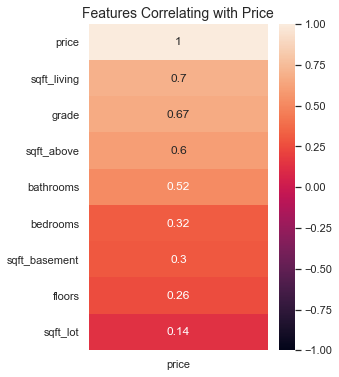

In [2]:
import IPython.display as display
display.Image('Images/Price_corr.png')

After fitting the model to sklearn's Linear Regression, the RSME score of this baseline model is enormous:
- Train RMSE: 2.397e+05
- Test RMSE:  2.376e+05  

This is to be somewhat expected with such a simple model, as we've barely provided it anything to train off. What these scores did show was that the model was only slightly under-fitting compared to the test score, which is useful to know.

Thankfully though, the models `price` correlation plot of it's predicted values against the actual values is at least comprehensive, and a slight positive correlation is shown.

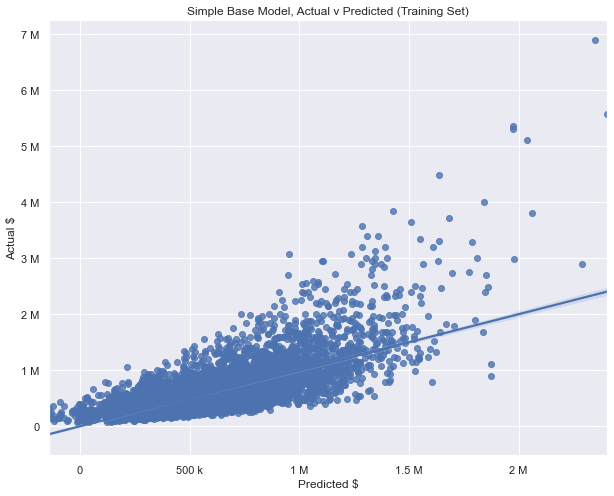

In [3]:
display.Image('Images/Base_Model.png')

However, it's qq-plot via ols was completely off, exhibiting a high Skew and Kurtosis within our set.

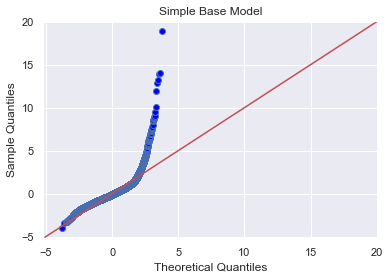

In [4]:
display.Image('Images/Base_qqplot.png')

It was also discovered by doing a simple regression plot in seabron that the `grade` feature was showcasing the characteristics of being categorical data.

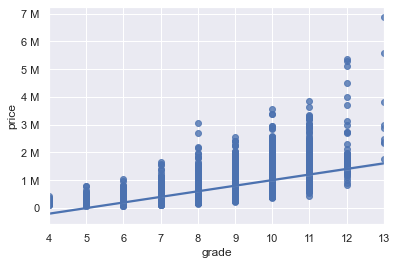

In [5]:
display.Image('Images/Grade_Catergorical.png')

After researching further into King County's building grade glossary, it was established that even though it is Categorical data, it was Ordinal and also linear in it's scale.

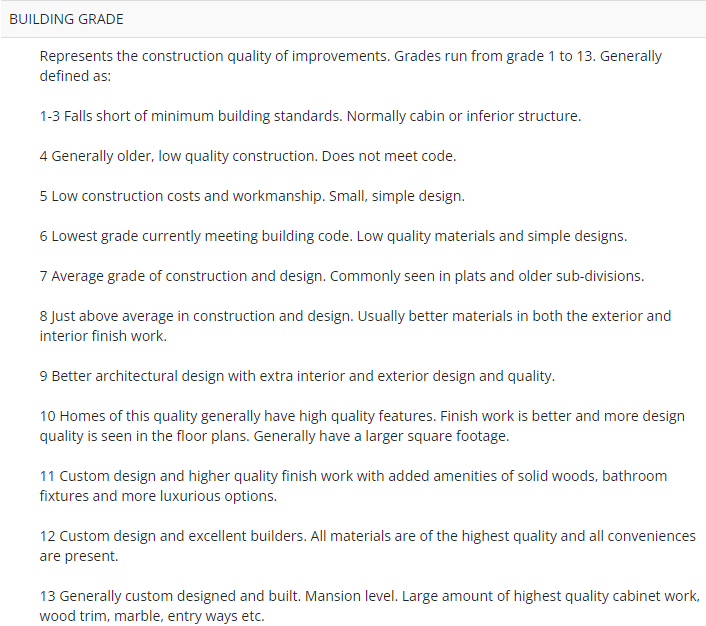

In [6]:
display.Image('Images/kc_building_grades.png')

Therefore, the `grade` column did not require one-hot encoding for the model.  
For further information please head to [King County's Website Glossary](https://info.kingcounty.gov/assessor/esales/Glossary.aspx?type=r#b)

## Model 2

Using the evidence gathered from the simple base model, the next iteration involved tackling the high Skew and Kurtosis evident, as well as providing the model with knowledge on which features were categorical.   

Firstly, through visualisation, the 'price' variable distribution was discernably illustrating positive skewness, with a very large right tail.

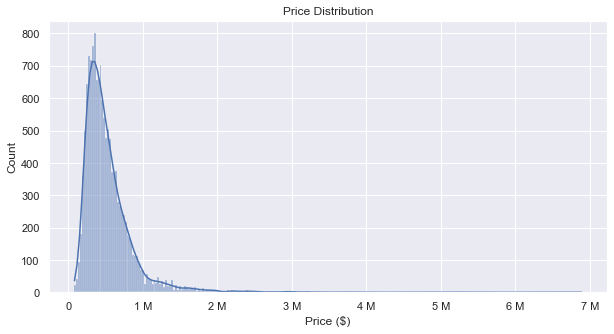

In [7]:
display.Image('Images/Price_Distribution.png')

This would be why the simple base model was showing such intense Skew and Kurtosis within it's qq-plot, and could also definitly be affecting the high RMSE score.  

In order to adjust for this distribution, the 'price' column needed to be normalised. Through another visualisation of it's values after they had been through a log1p formula, the variable illustrated a much more normal curve, and confirmed that this form of transformation would be appropriate.

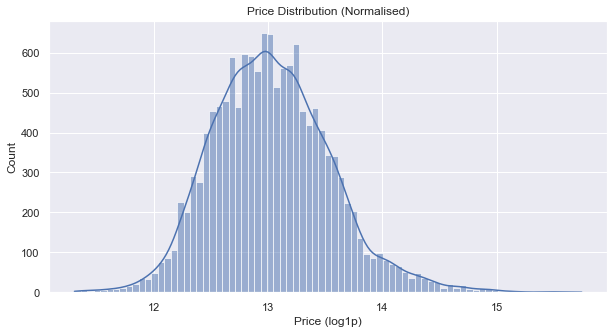

In [8]:
display.Image('Images/Price_Dist_Normal.png')

Once this normalisation was duplicated on the test split, the RMSE scores had decreased dramatically, even coming to within a normal range of 0.2 - 0.5:  
- Train RMSE: 3.454e-01 (0.34)
- Test RMSE: 3.455e-01 (0.34)    

The train and test scores had also become much closer than the previous iteration.   
Against it's predicted values, this next model iteration looked much better than the first.

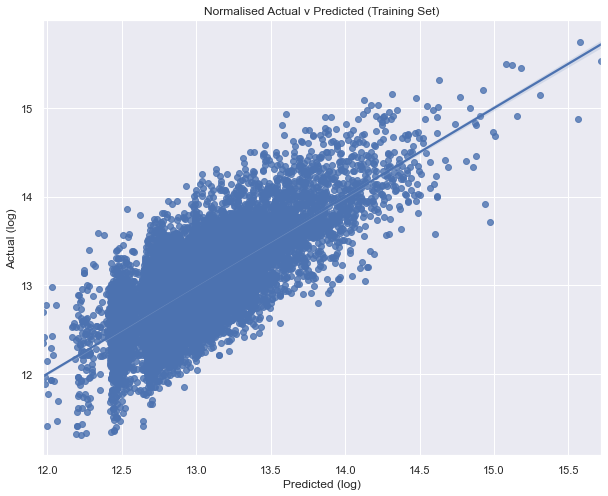

In [10]:
display.Image('Images/Price_Transformed_Model.png')

Next, the ols model was advised of the categorical nature of the 'grade' variable, and in turn the qq-plot outputted looked much more normal as well.   
However there were still some odd flicks at the start of the figure.

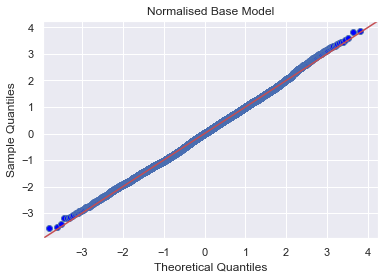

In [9]:
display.Image('Images/Norm_qqplot.png')

## Model 3

For the next model iteration, it was time to add the rest of the architectural features.   
Doing this didn't greatly improve the model, with only slight changes evident in the qq-plot.

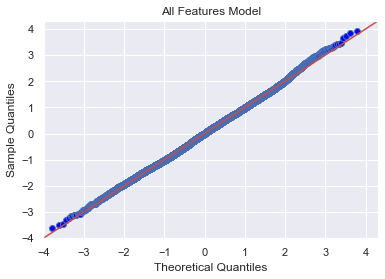

In [12]:
display.Image('Images/All_Features_qqplot.png')

It also marginally decreased the RMSE values as well:
- Train RMSE: 3.437e-01
- Test RMSE: 3.444e-01   

It was time to look into these other features to identify what can be improved upon further.

## Model 4

For Iteration 4, firstly the correlation between the features and their distributions were viewed using a feature matrix.

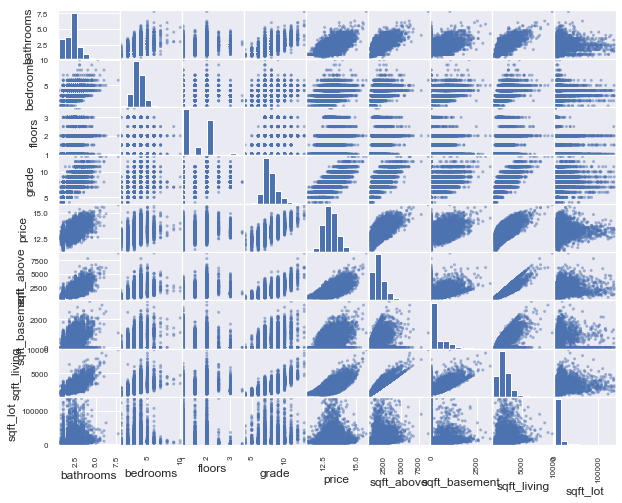

In [13]:
display.Image('Images/Feature_Matrix.png')

From this visualisation, two key attributes were shown:
1) The `bedrooms` and `floor` data also showed characteristics of being categorical data. Again, they were Ordinal and Linear, so no one-hot encoding was needed.  
2) `sqft_living` and `sqft_above` were highly correlated with each other.  

A heat-map was then used to show the specific values of how correlated the features were to each other:

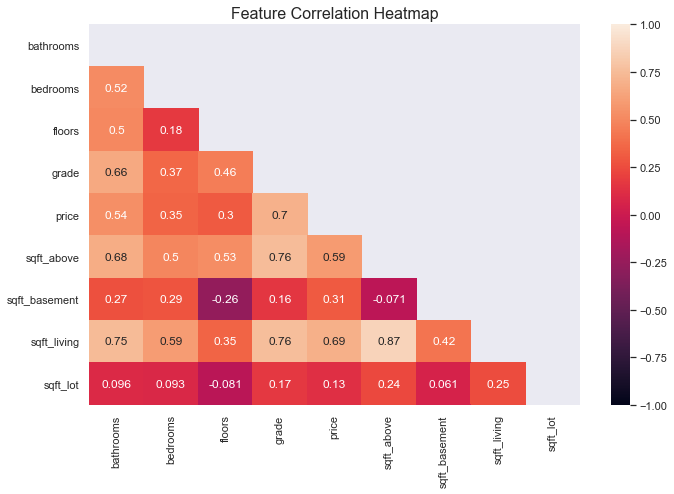

In [14]:
display.Image('Images/Feature_corr.png')

With the two features showing 0.87 (87%) correlation to one another, it was deemed crucial to drop one out of the pair. In the previous Price Correlation figure, it was demonstrated that `sqft_living` had a higher correlation to the house price than `sqft_above`, so the latter was dropped.  

However, due to the fact `sqft_living` included the area of the basement, there was now an overlap of data. To compensate for this, the `sqft_basement` column was transformed into Boolean values, to say whether the house had a basement or not.

After this feature transformation, and the multicolinearality of features dealt with, our new RMSE values were again slightly decreased:
- Train RMSE: 3.419e-01
- Test RMSE: 3.427e-01 

Prodiving the ols model with the notion that the bedroom and floor columns were categorical did change the qq-plot to some degree.

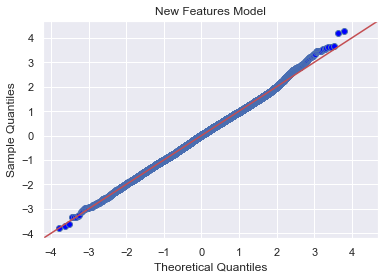

In [15]:
display.Image('Images/All_Features_qqplot.png')

## Model 5

For the fifth and final model iteration, it was now time to check whether variables showcased evidence of being homoscedastic due to their distributions. From the previous feature matrix, it can be seen that `sqft_living` and `sqft_lot` were highly skewed data.  

The regression plots, using `sqft_living` as an example, definitely exhibited heteroscedasticity within this variable:

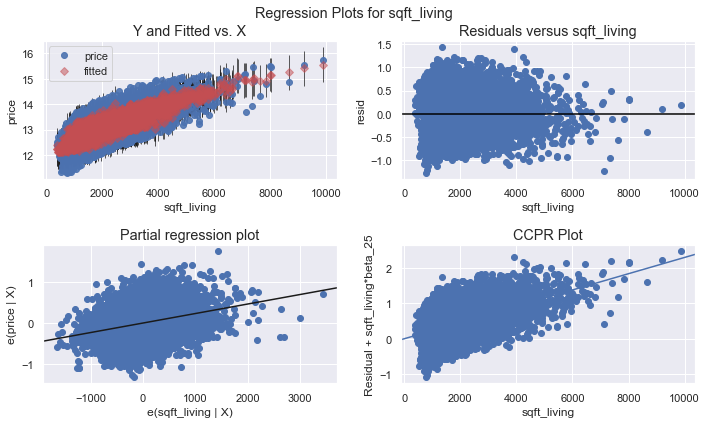

In [16]:
display.Image('Images/Sqft_living_Regression.png')

Similar to how the `price` column was normalised, a function was defined to log1p transform these columns, and after being fit to the model once more, the variables showed much more homoscedastic characteristics.

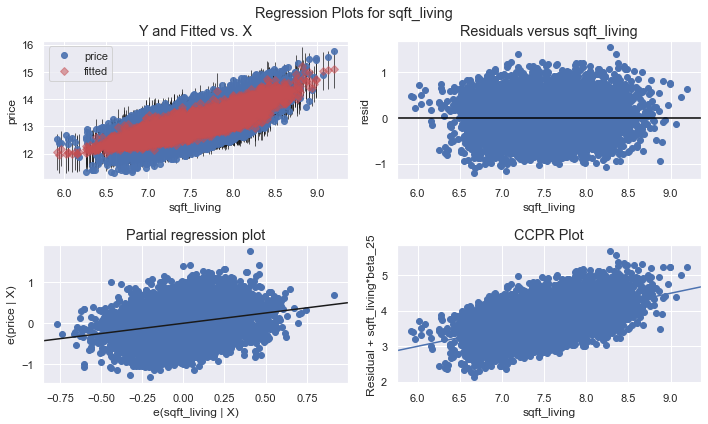

In [17]:
display.Image('Images/Sqft_living_Normal_Reg.png')

For full code please view the Jupyter Notebook [Regression Modelling](Code/Regression_Modelling.ipynb.ipynb)

# Regression Results

Now that the model was complete and both train and test data had been equally updated, sklearn's feature selector was utilised in order to determine which, out of all the architectural variables in play, were most highly correlated with the dependent variable of `price`.  

The results determined that the top 3 independent vairables were: 
1) `grade`  
2) `sqft_basement`  
3) `sqft_living`  

The below visualisations of these three variables confirms the feature selection, as they all show natures of being strongly correlated with `price`.

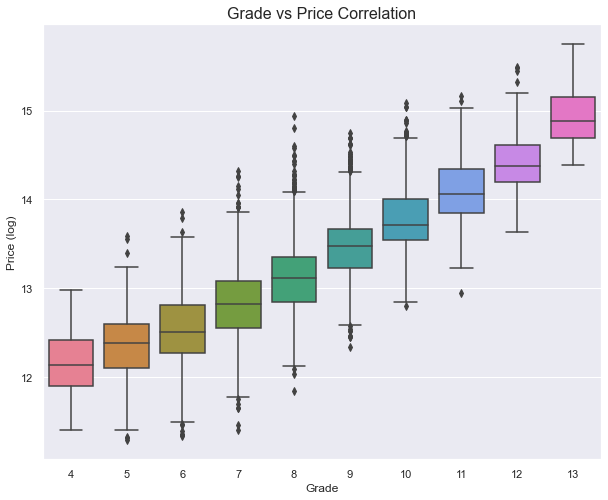

In [19]:
display.Image('Images/Grade_v_Price_Correlation.png')

With this conclusion, it is observable that the better construction materials, and more complex/well-planned architecture of the house, the higher the price the house will sell for. Some of the key attributes for these higher grades include:  
- Quality design seen in the floor plans  
- Higher quality finish work on interior and exterior  
- Added amenities including solid woods, bathroom fixtures  
- All materials are of the highest quality  

Further Linear Regression analysis revealed that approximately for every grade level attained, the house price will increase by roughly $ 104,000 USD.

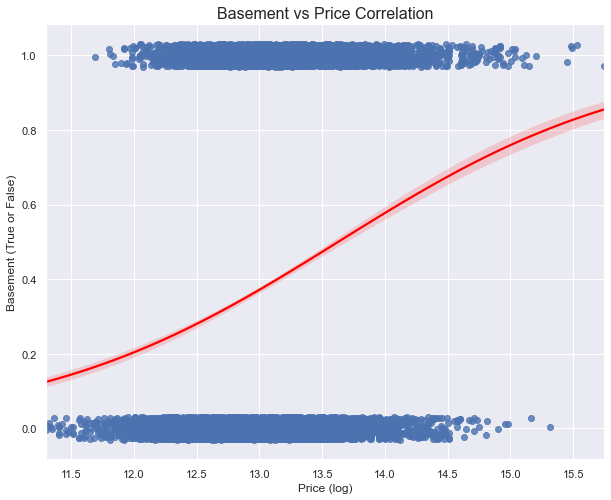

In [20]:
display.Image('Images/Basement_v_Price_Correlation.png')

If the house is built with a basement, the house price will approximately increase by roughly \$ 61,000 USD.

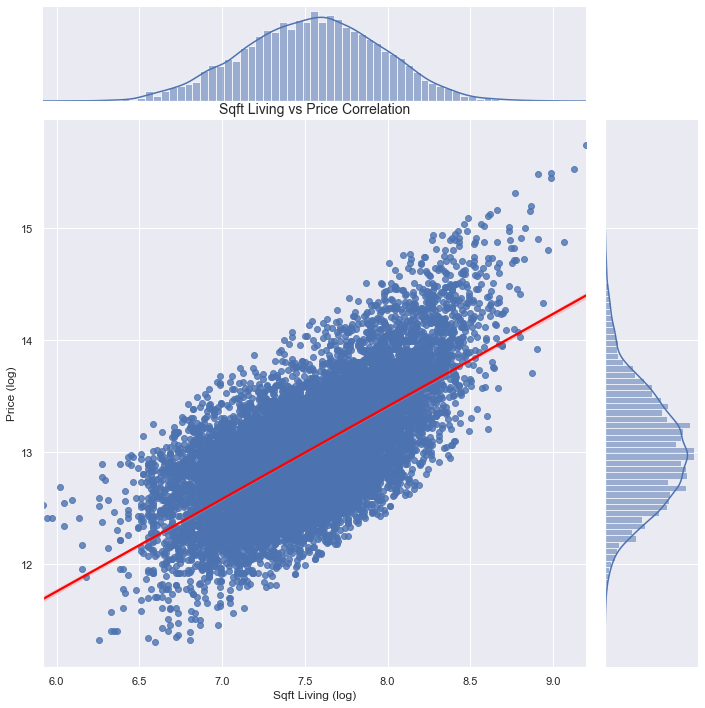

In [22]:
display.Image('Images/SqftLiving_v_Price_Correlation.png')

Approximately for every 1 sqft of living space added, the house price will increase by \$ 165 USD.

# Conclusion

Based off these regression analysis results, Metricon Homes should ensure the following to maximise the selling price of the houses they intend to construct:  
- **The houses should have high quality architectrual designs, with high calibre materials, finish and ammenities, to ensure the home is granted a high `grade` by the King County Council.** Evidently, people in the King County will pay more for a well built and well constructed home.  
- **The houses should be built with a basement.**  This is a very important note, as Australian homes are rarely built with a basement. However, it is obviously an extremely important factor when purchasing a house in the U.S. most likely due the common nature of Tornado weather systems.  
- **The houses should have a large square footage of living space.**  

## Next Steps

Further analysis could produce supplementary understanding of what is correlated with house pricing:  
- **Analysis of location data can be utilised to find which areas to build in**. This particular data set had very incomplete/skewed data when it came to the zip-code, so using further external data sources could provide useful information on which areas of King County are correlated with selling prices.
- **Investigate Median Income trends**. There has been previous industry research that concluded the Median Income for an area can determine the house selling prices. When coupled with the above modelling, this data may have a more sophisticated understanding of where houses might sell for a higher price.
- **Gather housing data on other potential Counties**. If Metricon Homes is presented with similar Subdivision projects, this regression model may be used on other Counties housing data within the U.S to see if the have differing ideas of what is correlated with house price.